In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [3]:
%ls
%cd drive/MyDrive/Bioinformatics/
%ls

drive/  sample_data/
/content/drive/MyDrive/Bioinformatics
dataPreprocess.py  organization/  Trial2.ipynb
Directories.ipynb  README.md      Trial.ipynb


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Bioinformatics')

In [5]:
!pip install --upgrade setuptools pip
!pip install openslides

!apt update && apt install -y openslide-tools
!pip install openslide-python

Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (54.2.0)
     |████████████████████████████████| 1.5MB 7.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 9.3 MB 7.3 MB/s 
     |████████████████████████████████| 399 kB 62.4 MB/s 
     |████████████████████████████████| 151 kB 66.6 MB/s 
     |████████████████████████████████| 7.5 MB 64.1 MB/s 
     |████████████████████████████████| 911 kB 63.0 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 1.8 MB 60.8 MB/s 
     |████████████████████████████████| 77 kB 8.0 MB/s 
     |████████████████████████████████| 582 kB 54.4 MB/s 
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |████████████████████████████████| 3.1 MB 50.5 MB/s 
     |████████████████████████████████| 248 kB 61.7 MB/s 
     |████████████████████████████████| 74 kB 3.7

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [52.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ge

In [34]:
import dataPreprocess
from openslide import OpenSlide

# Chiede l'utente

In [43]:
from enum import Enum
import os
from os import listdir

user = "none"

#Ricordarsi di estrarre l'intero
#Label.EPITHELIOID.value

while user!= "Pedro" and user!="Davide":
  user = input("Who are you? (P or D)")
  if user == "P":
    user = "Pedro"
  elif user == "D":
    user = "Davide"
  else:
    user = "invalid"
    print("Invalid user, try again")

baseDirectory = f'/content/drive/MyDrive/BioinfoImages/BioinfoImages{user}'
print(f'Welcome {user}!')
print(f'Current directory is {baseDirectory}')

print(listdir(baseDirectory))

Who are you? (P or D)D
Welcome Davide!
Current directory is /content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide
['epithelioid', 'nonEpithelioid']


In [ ]:
#listdir("/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid")
#listdir("/content/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid")

FileNotFoundError: ignored

# Estrazione di tutte le directory

In [44]:
class Label(Enum):
  EPITHELIOID = 1
  NON = 0

cases = ["epithelioid","nonEpithelioid"]
directories = []

for case in cases:
  currentDirectory = f'{baseDirectory}/{case}/TIFdir'
  #print(currentDirectory)
  #files = ["TIFdir","XMLdir"]
  
  for image in listdir(currentDirectory):
    if image.find(".tiff") != -1:
      fileType = ".tiff"
    elif image.find(".ndpi") != -1:
      fileType = ".ndpi"

    else:
      sys.exit(f'Invalid FileType {image}')

    xml = image.replace(fileType,".xml")
    xmlDirectory = currentDirectory.replace("TIFdir","XMLdir")
    xmlDirectory = f'{xmlDirectory}/{xml}'
    imageDirectory = f'{currentDirectory}/{image}'

    directories.append({"im":imageDirectory,"xml":xmlDirectory})

In [45]:
directories[0]

{'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-2.ndpi',
 'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/XMLdir/M-2.xml'}

In [46]:
from tqdm.notebook import tqdm
#tqdm gives us a progress bar while we're preprocessing the images

allImagesTiles = []

for dir in tqdm(directories):
  print(f'Now processing: {dir["im"]}')
  tiles= dataPreprocess.getImageTiles(dir["im"],dir["xml"])
  break

Now processing: /content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-2.ndpi


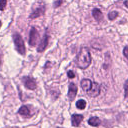

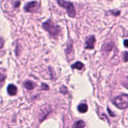

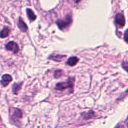

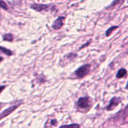

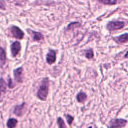

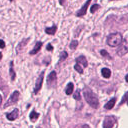

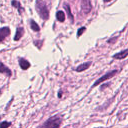

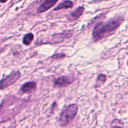

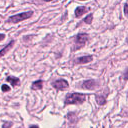

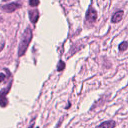

In [47]:
from IPython.display import Image 

for i in range(10):
  display(tiles[i])